In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [3]:
dataP = data.copy()

In [4]:
dataP.shape

(7234, 17)

In [5]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


In [6]:
dataP.isnull().sum()

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [7]:
con = ['job','education','contact','poutcome']
obj = ['job','marital','education','default','housing','loan','contact','month','poutcome','y'] 

In [8]:
dataP[obj]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,NaN,may,NaN,no
1,technician,single,secondary,no,yes,yes,NaN,may,NaN,no
2,blue-collar,married,secondary,no,yes,no,NaN,may,NaN,no
3,technician,married,secondary,no,no,no,NaN,may,NaN,no
4,technician,single,secondary,no,yes,yes,NaN,may,NaN,no
...,...,...,...,...,...,...,...,...,...,...
7229,services,single,secondary,no,no,no,cellular,nov,failure,no
7230,self-employed,single,tertiary,no,no,no,cellular,nov,success,yes
7231,management,married,tertiary,no,yes,yes,cellular,nov,failure,no
7232,management,married,tertiary,no,no,no,cellular,nov,NaN,no


In [9]:
dataP[obj] = dataP[obj].apply(lambda x: x.astype('category').cat.codes) 
dataP[obj].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,-1,8,-1,0
1,9,2,1,0,1,1,-1,8,-1,0
2,1,1,1,0,1,0,-1,8,-1,0
3,9,1,1,0,0,0,-1,8,-1,0
4,9,2,1,0,1,1,-1,8,-1,0


In [10]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        7234 non-null   int64
 1   job        7234 non-null   int8 
 2   marital    7234 non-null   int8 
 3   education  7234 non-null   int8 
 4   default    7234 non-null   int8 
 5   balance    7234 non-null   int64
 6   housing    7234 non-null   int8 
 7   loan       7234 non-null   int8 
 8   contact    7234 non-null   int8 
 9   day        7234 non-null   int64
 10  month      7234 non-null   int8 
 11  duration   7234 non-null   int64
 12  campaign   7234 non-null   int64
 13  pdays      7234 non-null   int64
 14  previous   7234 non-null   int64
 15  poutcome   7234 non-null   int8 
 16  y          7234 non-null   int8 
dtypes: int64(7), int8(10)
memory usage: 466.4 KB


In [11]:
dataP.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
dataP.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,-1,5,8,261,1,-1,0,-1,0
1,36,9,2,1,0,265,1,1,-1,5,8,348,1,-1,0,-1,0
2,25,1,1,1,0,-7,1,0,-1,5,8,365,1,-1,0,-1,0
3,53,9,1,1,0,-3,0,0,-1,5,8,1666,1,-1,0,-1,0
4,24,9,2,1,0,-103,1,1,-1,5,8,145,1,-1,0,-1,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataP)

StandardScaler()

In [14]:
x = scaler.transform(dataP)
x

array([[ 1.60336915, -0.08874691, -0.27900812, ..., -0.31010782,
        -0.41835318, -0.36562017],
       [-0.45161054,  1.44933445,  1.36325775, ..., -0.31010782,
        -0.41835318, -0.36562017],
       [-1.47910039, -1.01159573, -0.27900812, ..., -0.31010782,
        -0.41835318, -0.36562017],
       ...,
       [ 1.69677731, -0.08874691, -0.27900812, ...,  2.42965766,
         0.98925934, -0.36562017],
       [-0.35820237, -0.08874691, -0.27900812, ..., -0.31010782,
        -0.41835318, -0.36562017],
       [-1.47910039,  1.44933445,  1.36325775, ..., -0.31010782,
        -0.41835318,  2.73507888]])

In [15]:
dataP_imp = pd.DataFrame(x, columns=dataP.columns)
dataP_imp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.603369,-0.088747,-0.279008,1.196227,-0.136857,0.253187,0.884676,-0.438804,-1.424456,-1.278866,0.812462,-0.006974,-0.574483,-0.416185,-0.310108,-0.418353,-0.36562
1,-0.451611,1.449334,1.363258,-0.107012,-0.136857,-0.365864,0.884676,2.278924,-1.424456,-1.278866,0.812462,0.316563,-0.574483,-0.416185,-0.310108,-0.418353,-0.36562
2,-1.479100,-1.011596,-0.279008,-0.107012,-0.136857,-0.455525,0.884676,-0.438804,-1.424456,-1.278866,0.812462,0.379783,-0.574483,-0.416185,-0.310108,-0.418353,-0.36562
3,1.136328,1.449334,-0.279008,-0.107012,-0.136857,-0.454206,-1.130357,-0.438804,-1.424456,-1.278866,0.812462,5.217969,-0.574483,-0.416185,-0.310108,-0.418353,-0.36562
4,-1.572509,1.449334,1.363258,-0.107012,-0.136857,-0.487169,0.884676,2.278924,-1.424456,-1.278866,0.812462,-0.438357,-0.574483,-0.416185,-0.310108,-0.418353,-0.36562


In [16]:
dataP_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7234.0,3.127778e-17,1.000069,-3.627488,-0.731835,-0.171386,0.669287,10.850778
job,7234.0,1.423523e-15,1.000069,-1.626828,-1.011596,-0.088747,0.834102,1.756951
marital,7234.0,6.877581e-15,1.000069,-1.921274,-0.279008,-0.279008,1.363258,1.363258
education,7234.0,-3.370449e-15,1.000069,-2.713489,-0.107012,-0.107012,1.196227,1.196227
default,7234.0,-2.358671e-15,1.000069,-0.136857,-0.136857,-0.136857,-0.136857,7.306913
balance,7234.0,-5.146254e-16,1.000069,-1.545293,-0.428824,-0.303728,0.031591,26.314333
housing,7234.0,-1.632399e-15,1.000069,-1.130357,-1.130357,0.884676,0.884676,0.884676
loan,7234.0,9.757010e-15,1.000069,-0.438804,-0.438804,-0.438804,-0.438804,2.278924
contact,7234.0,4.177012e-14,1.000069,-1.424456,-1.424456,0.384941,0.384941,2.194338
day,7234.0,4.048117e-16,1.000069,-1.760373,-0.917735,0.045279,0.647162,1.850930


In [17]:
dfX = dataP_imp.drop(['y'], axis=1) 
dfy = dataP['y']   

In [18]:
dfX

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.603369,-0.088747,-0.279008,1.196227,-0.136857,0.253187,0.884676,-0.438804,-1.424456,-1.278866,0.812462,-0.006974,-0.574483,-0.416185,-0.310108,-0.418353
1,-0.451611,1.449334,1.363258,-0.107012,-0.136857,-0.365864,0.884676,2.278924,-1.424456,-1.278866,0.812462,0.316563,-0.574483,-0.416185,-0.310108,-0.418353
2,-1.479100,-1.011596,-0.279008,-0.107012,-0.136857,-0.455525,0.884676,-0.438804,-1.424456,-1.278866,0.812462,0.379783,-0.574483,-0.416185,-0.310108,-0.418353
3,1.136328,1.449334,-0.279008,-0.107012,-0.136857,-0.454206,-1.130357,-0.438804,-1.424456,-1.278866,0.812462,5.217969,-0.574483,-0.416185,-0.310108,-0.418353
4,-1.572509,1.449334,1.363258,-0.107012,-0.136857,-0.487169,0.884676,2.278924,-1.424456,-1.278866,0.812462,-0.438357,-0.574483,-0.416185,-0.310108,-0.418353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,-1.479100,0.834102,1.363258,-0.107012,-0.136857,-0.387620,-1.130357,-0.438804,0.384941,0.045279,1.146859,-0.334230,-0.574483,0.521493,2.429658,0.989259
7230,-1.198876,0.526486,1.363258,1.196227,-0.136857,-0.400805,-1.130357,-0.438804,0.384941,0.045279,1.146859,0.692164,-0.239310,-0.073378,1.881705,3.804484
7231,1.696777,-0.088747,-0.279008,1.196227,-0.136857,-0.407728,0.884676,2.278924,0.384941,0.045279,1.146859,-0.375137,-0.239310,1.479336,2.429658,0.989259
7232,-0.358202,-0.088747,-0.279008,1.196227,-0.136857,0.017499,-1.130357,-0.438804,0.384941,0.045279,1.146859,0.260781,-0.239310,-0.416185,-0.310108,-0.418353


In [19]:
dfy

0       0
1       0
2       0
3       0
4       0
       ..
7229    0
7230    1
7231    0
7232    0
7233    1
Name: y, Length: 7234, dtype: int8

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, random_state=0)  

In [21]:
display(X_train.shape, X_test.shape)
X_train.head(3)

(5425, 16)

(1809, 16)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3460,0.762696,-1.011596,-0.279008,-2.713489,-0.136857,-0.451569,-1.130357,-0.438804,0.384941,0.406409,-1.528313,-0.226384,-0.574483,-0.416185,-0.310108,-0.418353
4677,-1.385692,1.141718,1.363258,-0.107012,-0.136857,-0.453217,-1.130357,-0.438804,0.384941,-1.639996,-0.859520,3.570531,-0.239310,-0.416185,-0.310108,-0.418353
5526,-0.358202,-1.011596,-0.279008,-1.410250,-0.136857,-0.696487,0.884676,-0.438804,0.384941,-1.278866,0.812462,0.149217,-0.574483,-0.416185,-0.310108,-0.418353


In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit_transform(dfX)

array([[ 1.        ,  1.60336915, -0.08874691, ...,  0.09616686,
         0.12973459,  0.17501939],
       [ 1.        , -0.45161054,  1.44933445, ...,  0.09616686,
         0.12973459,  0.17501939],
       [ 1.        , -1.47910039, -1.01159573, ...,  0.09616686,
         0.12973459,  0.17501939],
       ...,
       [ 1.        ,  1.69677731, -0.08874691, ...,  5.90323636,
         2.40356154,  0.97863404],
       [ 1.        , -0.35820237, -0.08874691, ...,  0.09616686,
         0.12973459,  0.17501939],
       [ 1.        , -1.47910039,  1.44933445, ...,  0.09616686,
         0.12973459,  0.17501939]])

In [23]:
print(X_train.shape)

poly = PolynomialFeatures(2)
poly.fit_transform(X_train).shape

(5425, 16)


(5425, 153)

In [24]:
from sklearn.feature_selection import SelectKBest

print(X_train.shape)
X_train_new = SelectKBest(k=6).fit_transform(X_train, y_train)
X_train_new.shape

(5425, 16)


(5425, 6)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train)
scores

array([0.89032258, 0.89585253, 0.8921659 , 0.88018433, 0.88387097])

In [27]:
scores = cross_val_score(model, X_train, y_train, cv=10)
scores

array([0.88581952, 0.89134438, 0.8839779 , 0.90239411, 0.90423573,
       0.88191882, 0.87822878, 0.87822878, 0.88560886, 0.87822878])

In [28]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))
# 분산이 작으면 Overfitting 이 적다

Mean: 0.887
Std: 0.009
Min: 0.878
Max: 0.904


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [31]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [32]:
pred_tree = tree.predict(X_test)
pred_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [33]:
display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.9148387096774193

0.8905472636815921

In [34]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train, y_train).score(X_test, y_test)

0.896627971254837

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.896627971254837

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)

X_test_scaled = scaler.transform(X_test) 
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.8960751796572692

In [46]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

In [47]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
print("Dummy model:")
print(accuracy_score(y_test, pred_dummy))
print("Decision tree:")
print(accuracy_score(y_test, pred_tree))

Dummy model:
0.8872305140961857
Decision tree:
0.8911000552791598


In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [50]:
fpr, tpr, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
auc(fpr, tpr)

0.741376519455134

In [51]:
def plot_roc_curve(fpr, tpr, model, color=None) :
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

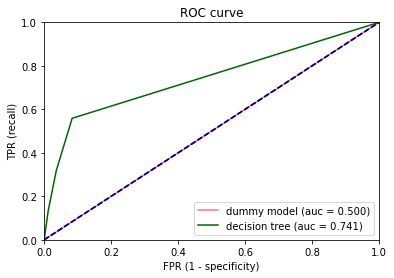

In [52]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, 
                                    dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(y_test, 
                                  tree.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'decision tree', 'darkgreen')